In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
Zoo=pd.read_csv("zoo.csv")
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
X = Zoo.iloc[:, 1:16]
Y = Zoo.iloc[:, 16]

In [8]:
#KNN

In [ ]:
# Using k fold cross validation

In [14]:
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=12)
results = cross_val_score(model, X, Y, cv=kfold)
print(results,'\n')
print(results.mean())

[0.90909091 0.8        0.7        0.8        0.9        0.5
 0.9        0.8        0.7        0.5       ] 

0.7509090909090909


In [15]:
#Grid Search for Algorithm Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

In [41]:
n_neighbors = np.array(range(10,34))
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors
param_grid

{'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33])}

In [42]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33])})

In [43]:
print(grid.best_score_,'\n')
print(grid.best_params_)

0.770952380952381 

{'n_neighbors': 10}


# Visualizing the CV Result

In [44]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(10,34)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

0     0.770909
2     0.750909
3     0.750909
1     0.750909
4     0.740909
11    0.730909
16    0.730909
15    0.730909
14    0.730909
13    0.730909
12    0.730909
10    0.730909
9     0.730909
8     0.730909
7     0.730909
6     0.730909
5     0.730909
18    0.720909
20    0.720909
22    0.720909
17    0.710909
19    0.710909
21    0.700909
23    0.700909
dtype: float64

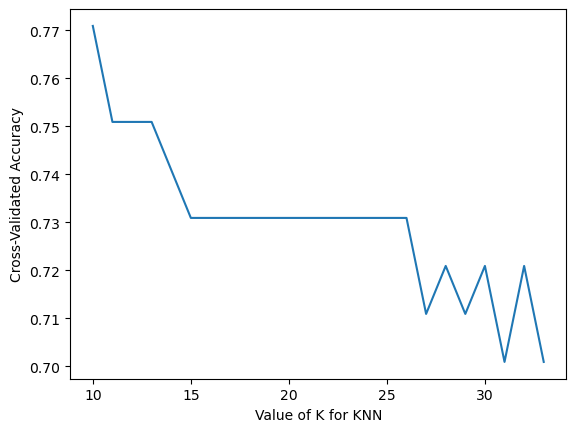

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = range(10,34)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Conclusion

In [ ]:
The average score of the best estimator across all cross-validation folds. is 77.09%